<a href="https://colab.research.google.com/github/ahmed05islam-del/a7med/blob/main/task_svm_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#importing the data and overview

train_df= pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_df.shape

(891, 12)

In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

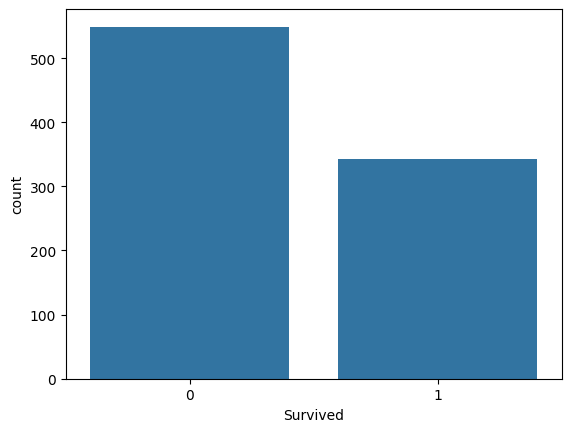

In [16]:
sns.countplot(data=train_df, x='Survived')

# survived = 1
# didn't survive = 0

<Axes: >

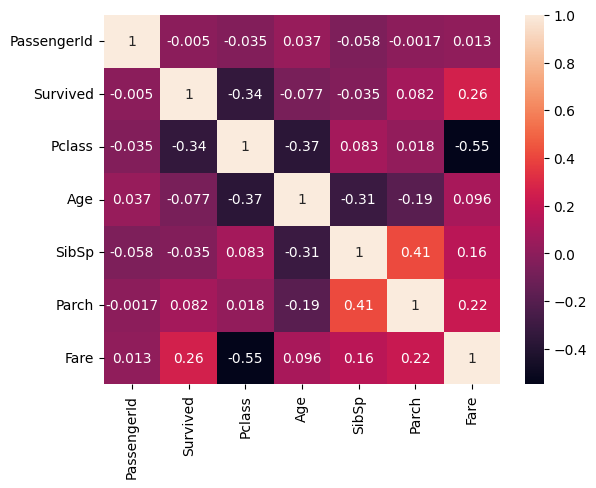

In [22]:
sns.heatmap(train_df.select_dtypes(include=['int64','float64']).corr(), annot=True)


In [23]:
#Data preparation
#looking for null values and taking care of them

train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# fill the nans in "Age" with "mean"

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())



In [26]:
# deal with categorical data in "Sex" col (hint: do some encoding or replace the object values with int)

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})



In [27]:
train_df.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)

In [28]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0


In [29]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

,0
Sex,891


In [ ]:
#defining features and the label

X= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [31]:
#spliting the dataset to work on train and test
from sklearn.model_selection import train_test_split


X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
#feature scaling


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array([[10, 0.1],
              [20, 0.2],
              [50, 0.5],
              [90, 0.9],
              [100, 1.0]])
y = np.array([0, 0, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.preprocessing import StandardScaler


In [33]:
#training the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [35]:

y_pred = model.predict(X_test_scaled)


y_pred_proba = model.predict_proba(X_test_scaled)

# Display results
print(f"Predicted Class: {y_pred[0]}")
print(f"Actual Class:    {y_test[0]}")
print(f"Probability (0 vs 1): {y_pred_proba[0]}")


Predicted Class: 0
Actual Class:    0
Probability (0 vs 1): [0.50890034 0.49109966]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Confusion Matrix:
 [[1]]


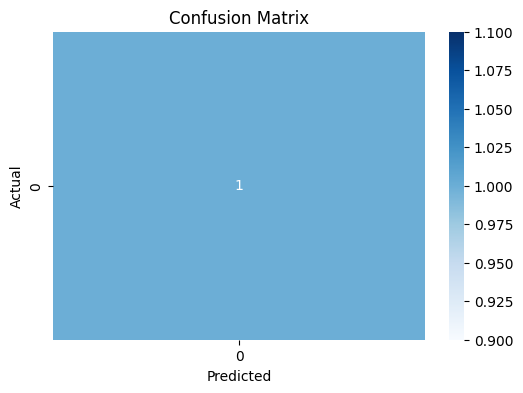

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#print the classification_report
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [45]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


np.random.seed(42)
X = np.random.rand(100, 2) * 100
y = (X[:, 0] + X[:, 1] > 50).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Score: 1.0


In [46]:
# train the model after applaying the GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_

print("Best Parameters Found:", grid_search.best_params_)


y_pred_optimized = best_model.predict(X_test_scaled)

print("\nAccuracy of Optimized Model:", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))

Best Parameters Found: {'C': 10, 'solver': 'lbfgs'}

Accuracy of Optimized Model: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.94      0.97        17

    accuracy                           0.95        20
   macro avg       0.88      0.97      0.91        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
# print the best estimator (best model)


In [47]:

print(grid_search.best_params_)


{'C': 10, 'solver': 'lbfgs'}


In [48]:

new_data = np.array([[45, 0.6],
                     [85, 0.2]])


new_data_scaled = scaler.transform(new_data)


best_model = grid_search.best_estimator_

predictions = best_model.predict(new_data_scaled)
probabilities = best_model.predict_proba(new_data_scaled)

for i, pred in enumerate(predictions):
    print(f"Sample {i+1}:")
    print(f"  Input Features: {new_data[i]}")
    print(f"  Predicted Class: {pred}")
    print(f"  Confidence (Probabilities): {probabilities[i]}")
    print("-" * 30)

Sample 1:
  Input Features: [45.   0.6]
  Predicted Class: 0
  Confidence (Probabilities): [0.8007465 0.1992535]
------------------------------
Sample 2:
  Input Features: [85.   0.2]
  Predicted Class: 1
  Confidence (Probabilities): [0.00920337 0.99079663]
------------------------------


Confusion Matrix:
 [[ 3  0]
 [ 1 16]]


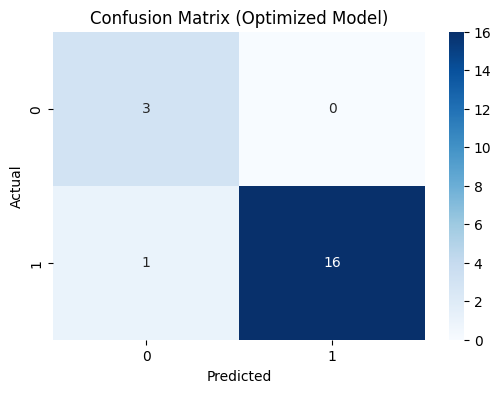

In [49]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred_optimized)

print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Optimized Model)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#print the classification_report
